In [45]:
import json
from matplotlib import pyplot as plt
from collections import defaultdict
from sklearn import linear_model
import numpy
import random
import gzip
import math
import pandas as pd
import math
import string
import re
import nltk
#nltk.download ()
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize,word_tokenize

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import wordcloud

In [3]:
f = gzip.open("renttherunway_final_data.json.gz")
dataset = []
for l in f:
    dataset.append(json.loads(l))

In [4]:
dataset[0]

{'fit': 'fit',
 'user_id': '420272',
 'bust size': '34d',
 'item_id': '2260466',
 'weight': '137lbs',
 'rating': '10',
 'rented for': 'vacation',
 'review_text': "An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.",
 'body type': 'hourglass',
 'review_summary': 'So many compliments!',
 'category': 'romper',
 'height': '5\' 8"',
 'size': 14,
 'age': '28',
 'review_date': 'April 20, 2016'}

In [5]:
df = pd.read_json("renttherunway_final_data.json.gz",lines = True)

In [6]:
df = df.drop(df.columns[[1,3,14]], axis=1)

In [7]:
df.loc[0:0]

,fit,bust size,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0


In [8]:
x_df = df[["fit","bust size","weight","rented for","review_text","body type","review_summary","height","size","age"]]

In [9]:
x_df.loc[0:0]

,fit,bust size,weight,rented for,review_text,body type,review_summary,height,size,age
0,fit,34d,137lbs,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,"5' 8""",14,28.0


In [10]:
y_df = df[["rating"]]

In [11]:
y_df.loc[0:0]

,rating
0,10.0


In [12]:
arr=[]
for i in range(len(x_df)):
    try:
        string = x_df["weight"][i]
        ind = string.find("lbs")
        x_df["weight"][i] = int(string[:ind])
    except:
        arr.append(x_df["weight"][i])

/var/folders/kl/8j13qjxs4fd9fz6_ng5b4qpc0000gn/T/ipykernel_92908/1147160215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df["weight"][i] = int(string[:ind])


<AxesSubplot: ylabel='Density'>

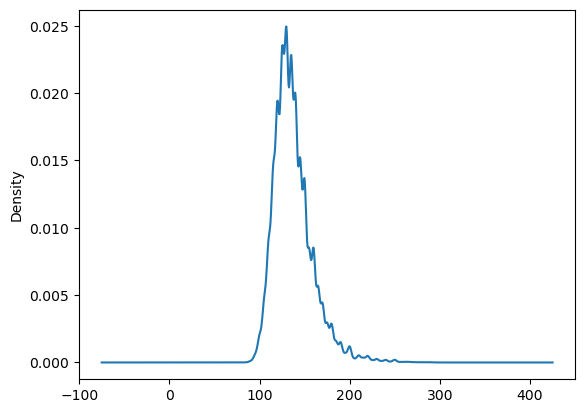

In [13]:
x_df['weight'].plot(kind='kde')

<AxesSubplot: ylabel='Density'>

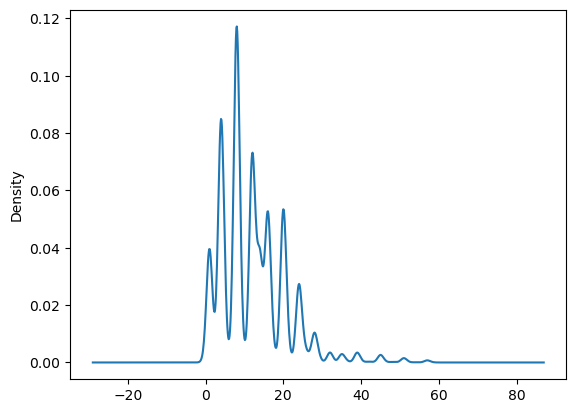

In [14]:
x_df['size'].plot(kind='kde')

<AxesSubplot: ylabel='Density'>

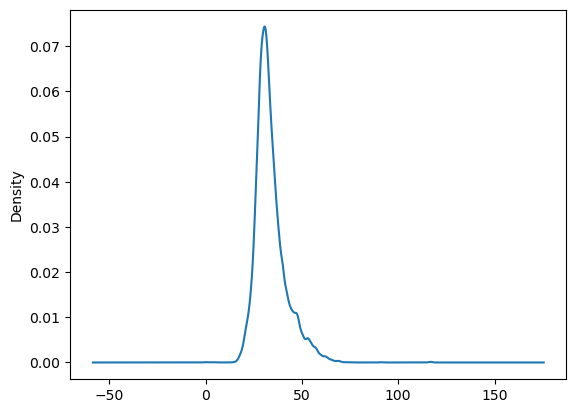

In [15]:
x_df['age'].plot(kind='kde')

<AxesSubplot: >

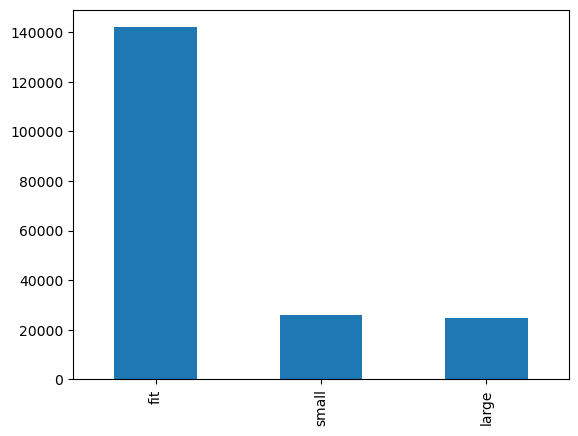

In [16]:
x_df['fit'].value_counts().plot(kind='bar')

<AxesSubplot: >

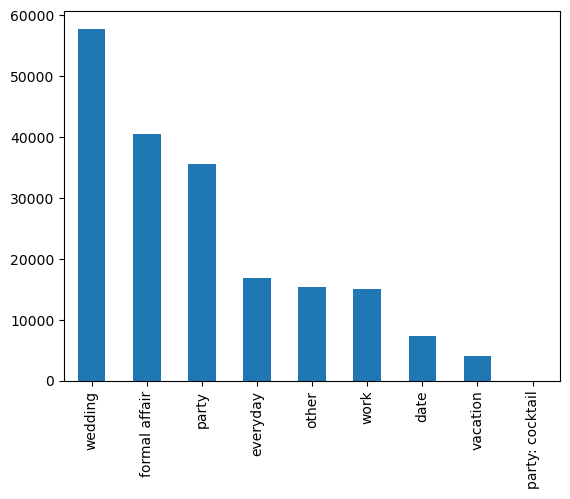

In [17]:
x_df['rented for'].value_counts().plot(kind='bar')

<AxesSubplot: >

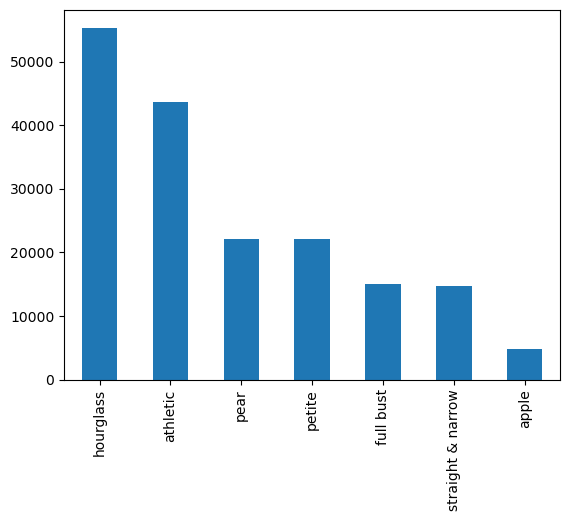

In [18]:
x_df['body type'].value_counts().plot(kind='bar')

<AxesSubplot: >

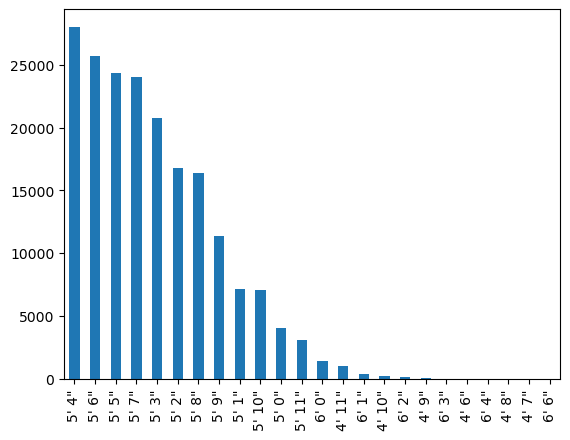

In [19]:
x_df['height'].value_counts().plot(kind='bar')

<AxesSubplot: >

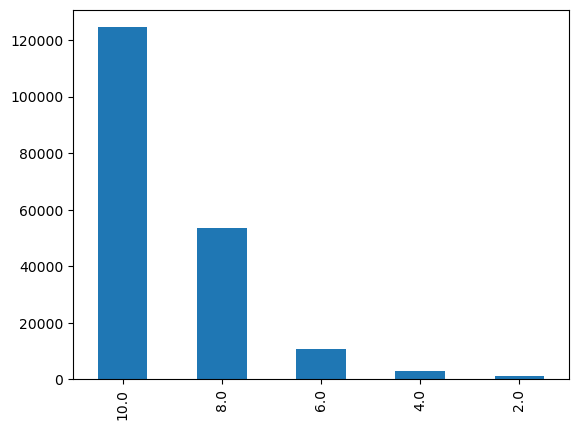

In [20]:
y_df['rating'].value_counts().plot(kind='bar')

In [22]:
# y_df['category'].value_counts().plot(kind='bar')

In [23]:
#drop category rented for
#convert height to decimals
#categorize fit,body type 
#standardize weight
#normalise size height
try:
    x_df = x_df.drop('bust size', axis=1)
    x_df = x_df.drop('rented for', axis=1)
    y_df = y_df.drop('category', axis=1)
except:
    print("Column not found")

Column not found


In [24]:
x_df[0:1]

,fit,weight,review_text,body type,review_summary,height,size,age
0,fit,137,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,"5' 8""",14,28.0


In [25]:
x_df["fit"]=df["fit"]

In [ ]:
arr=[]
for i in range(len(x_df)):
    try:
        string = x_df["height"][i]
        ind1 = string.find('\'')
        ind2 = string.find('\"')
        fin  = string[:ind1] + '.' + string[ind1+2:ind2]
        x_df["height"][i]=float(fin)
    except Exception as e:
        arr.append(fin)

In [ ]:
x_df['height'].plot(kind='kde')

In [26]:
y_df['rating'].fillna(value=y_df['rating'].mean(), inplace=True)

/var/folders/kl/8j13qjxs4fd9fz6_ng5b4qpc0000gn/T/ipykernel_92908/1056078454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_df['rating'].fillna(value=y_df['rating'].mean(), inplace=True)


In [27]:
ratings = []
small_ratings = []
large_ratings = []
for i in range(len(x_df)):
    if x_df['fit'][i]=='fit':
        ratings.append(y_df['rating'][i])
    if x_df['fit'][i]=='small':
        small_ratings.append(y_df['rating'][i])
    if x_df['fit'][i]=='large':
        large_ratings.append(y_df['rating'][i])

In [28]:
mean_fit_rating=0
for i in range(len(ratings)):
    mean_fit_rating = mean_fit_rating+ratings[i]
mean_fit_rating=mean_fit_rating/len(ratings)
mean_fit_rating

9.308372773116

In [29]:
mean_small_rating=0
for i in range(len(small_ratings)):
    mean_small_rating = mean_small_rating+small_ratings[i]
mean_small_rating=mean_small_rating/len(small_ratings)
mean_small_rating

8.419693437078372

In [30]:
mean_large_rating=0
for i in range(len(large_ratings)):
    mean_large_rating = mean_large_rating+large_ratings[i]
mean_large_rating=mean_large_rating/len(large_ratings)
mean_large_rating

8.552291979750596

In [31]:
x_df.isna().sum()

fit                   0
weight            29982
review_text           0
body type         14637
review_summary        0
height              677
size                  0
age                 960
dtype: int64

In [33]:
#x_df['height'].fillna(value=x_df['height'].mean(), inplace=True)

In [34]:
x_df['weight'].fillna(value=x_df['weight'].mean(), inplace=True)
x_df['age'].fillna(value=x_df['age'].mean(), inplace=True)

In [35]:
fill_list = x_df['body type'].unique()
fill_list = numpy.delete(fill_list, 2)
fill_list

array(['hourglass', 'straight & narrow', 'pear', 'athletic', 'full bust',
       'petite', 'apple'], dtype=object)

In [36]:
x_df['body type'] = x_df['body type'].fillna(pd.Series(numpy.random.choice(fill_list, size=len(x_df.index))))

In [37]:
y_df.isna().sum()

rating    0
dtype: int64

In [38]:
body_type_dict = {}
for i in range(len(x_df)):
    val = x_df['body type'][i]
    if val not in body_type_dict:
        body_type_dict[val] = []
    body_type_dict[val].append(y_df['rating'][i])

In [39]:
for key in body_type_dict:
    arr = body_type_dict[key]
    avg = sum(arr)/len(arr)
    body_type_dict[key]=avg
body_type_dict

{'hourglass': 9.083557672530128,
 'straight & narrow': 9.164879733320058,
 'athletic': 9.125054874696003,
 'pear': 9.056668512199689,
 'full bust': 9.044082399694366,
 'petite': 9.09620832199661,
 'apple': 9.005673758865248}

In [47]:
#x_df['height'].corr(y_df['rating'])

In [41]:
x_df['weight'].corr(y_df['rating'])

-0.02068278255305519

In [42]:
x_df['age'].corr(y_df['rating'])

-0.03518744883406894

In [43]:
x_df['size'].corr(y_df['rating'])

-0.0367257853968276

In [ ]:
#y_df.drop(['category'],axis=1)

In [46]:
x_df['review_text'] = df['review_text']

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
x_df['review_text']= x_df['review_text'].apply(lambda x:remove_punctuation(x))

x_df['review_text']= x_df['review_text'].apply(lambda x: x.lower())

def tokenization(text):
    tokens = word_tokenize(text)
    return tokens
#applying function to the column
x_df['review_text']= x_df['review_text'].apply(lambda x: tokenization(x))

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
x_df['review_text']= x_df['review_text'].apply(lambda x:remove_stopwords(x))

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
x_df['review_text']=x_df['review_text'].apply(lambda x:lemmatizer(x))

In [48]:
x_df['review_text'][0]

['adorable',
 'romper',
 'belt',
 'zipper',
 'little',
 'hard',
 'navigate',
 'full',
 'day',
 'wearbathroom',
 'use',
 'thats',
 'expected',
 'wish',
 'pocket',
 'absolutely',
 'perfect',
 'got',
 'million',
 'compliment']

In [49]:
plt.rcParams["figure.figsize"] = [10, 9]


def create_ngrams(token_list, nb_elements):

    ngrams = zip(*[token_list[index_token:] for index_token in range(nb_elements)])
    return (" ".join(ngram) for ngram in ngrams)


def frequent_words(list_words, ngrams_number=1, number_top_words=100):
    frequent = []
    if ngrams_number == 1:
        pass
    elif ngrams_number >= 2:
        list_words = create_ngrams(list_words, ngrams_number)
    else:
        raise ValueError("number of n-grams should be >= 1")
    counter = Counter(list_words)
    frequent = counter.most_common(number_top_words)
    return frequent


def make_word_cloud(text_or_counter, stop_words=None):
    if isinstance(text_or_counter, str):
        word_cloud = wordcloud.WordCloud(stopwords=stop_words).generate(text_or_counter)
    else:
        if stop_words is not None:
            text_or_counter = Counter(word for word in text_or_counter if word not in stop_words)
        word_cloud = wordcloud.WordCloud(stopwords=stop_words).generate_from_frequencies(text_or_counter)
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

In [50]:
words = []
for i in range(len(x_df)):
    if y_df['rating'][i]>=8:
        words+=x_df['review_text'][i]

In [51]:
word_list = frequent_words(words,3)
word_dict = {}
for i in range(len(word_list)):
    word_dict[word_list[i][0]] = word_list[i][1]

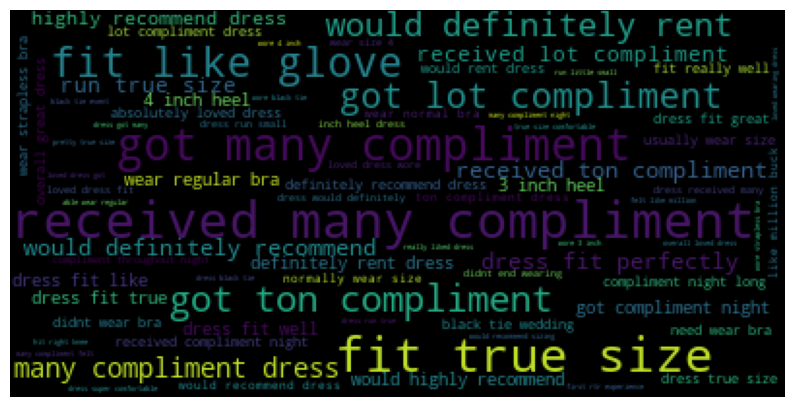

In [52]:
make_word_cloud(word_dict)

In [58]:
words = []
for i in range(len(x_df)):
    if y_df['rating'][i]<=7:
        words+=x_df['review_text'][i]
word_list = frequent_words(words,3)
word_dict = {}
for i in range(len(word_list)):
    word_dict[word_list[i][0]] = word_list[i][1]

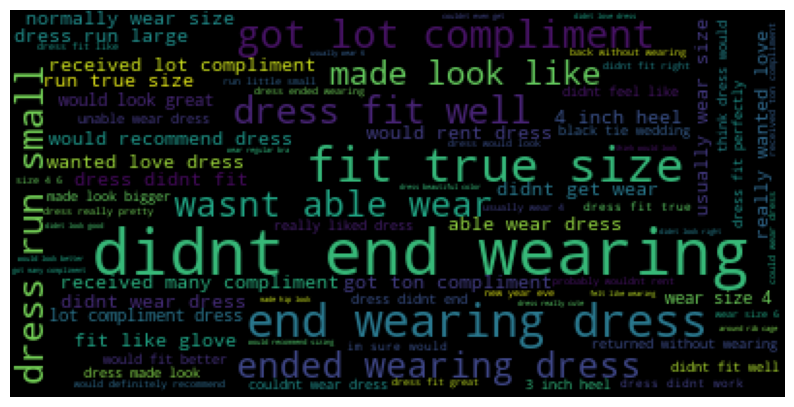

In [59]:
make_word_cloud(word_dict)

In [60]:
x_df['review_summary'] = df['review_summary']

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
x_df['review_summary']= x_df['review_summary'].apply(lambda x:remove_punctuation(x))

x_df['review_summary']= x_df['review_summary'].apply(lambda x: x.lower())

def tokenization(text):
    tokens = word_tokenize(text)
    return tokens
#applying function to the column
x_df['review_summary']= x_df['review_summary'].apply(lambda x: tokenization(x))

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
x_df['review_summary']= x_df['review_summary'].apply(lambda x:remove_stopwords(x))

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
x_df['review_summary']=x_df['review_summary'].apply(lambda x:lemmatizer(x))

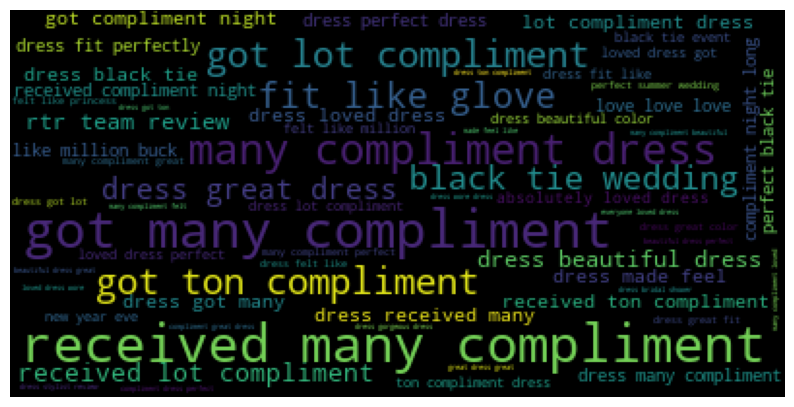

In [61]:
words = []
for i in range(len(x_df)):
    if y_df['rating'][i]>=8:
        words+=x_df['review_summary'][i]
word_list = frequent_words(words,3)
word_dict = {}
for i in range(len(word_list)):
    word_dict[word_list[i][0]] = word_list[i][1]
make_word_cloud(word_dict)

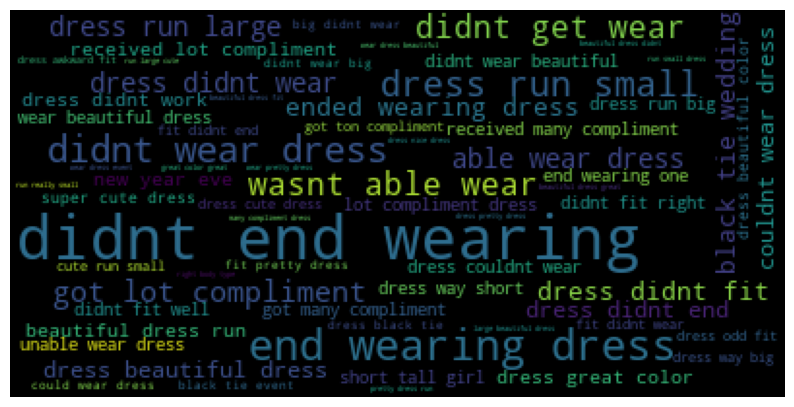

In [62]:
words = []
for i in range(len(x_df)):
    if y_df['rating'][i]<=7:
        words+=x_df['review_summary'][i]
word_list = frequent_words(words,3)
word_dict = {}
for i in range(len(word_list)):
    word_dict[word_list[i][0]] = word_list[i][1]
make_word_cloud(word_dict)

In [63]:
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
#sid.polarity_scores('I hate you')

In [64]:
x_df['summary'] = df['review_summary']

In [65]:
pos_arr = []
neg_arr = []
for i in range(len(x_df)):
    sent_dict = sid.polarity_scores(x_df['summary'][i])
    if sent_dict['compound']>0:
        pos_arr.append(y_df['rating'][i])
    else:
        neg_arr.append(y_df['rating'][i])
pos_mean = sum(pos_arr)/len(pos_arr)
neg_mean = sum(neg_arr)/len(neg_arr)
pos_mean

9.233257934517695

In [66]:
neg_mean

8.431874144788878

In [67]:
x_df['text'] = df['review_text']

In [68]:
pos_arr = []
neg_arr = []
for i in range(len(x_df)):
    sent_dict = sid.polarity_scores(x_df['text'][i])
    if sent_dict['compound']>0:
        pos_arr.append(y_df['rating'][i])
    else:
        neg_arr.append(y_df['rating'][i])
pos_mean = sum(pos_arr)/len(pos_arr)
neg_mean = sum(neg_arr)/len(neg_arr)
pos_mean

9.169233850820719

In [69]:
neg_mean

7.848095829845071